In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_docs as tfdocs
tf.keras.backend.clear_session()
print('Tensorflow version: %s' % str(tf.__version__))

import sys
import os
if sys.platform.startswith('darwin'):
    print('Enable multiple instances of OpenMP on macOS')
    os.environ['KMP_DUPLICATE_LIB_OK']='True'
print()

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
print('Prepared data visualization')
print()

import numpy as np
import pandas as pd
import pathlib
print('Prepared data manipulation, numpy version: ', str(np.__version__))

Tensorflow version: 2.3.1
Enable multiple instances of OpenMP on macOS

Prepared data visualization

Prepared data manipulation, numpy version:  1.18.5


In [2]:
print('Prepare minist dataset')
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # download from web
x_train, x_test = x_train / 255.0, x_test / 255.0
print('shape of training data %s -> %s' % (str(x_train.shape), str(y_train.shape)))
print('shape of test data %s -> %s' % (str(x_test.shape), str(y_test.shape)))

Prepare minist dataset
shape of training data (60000, 28, 28) -> (60000,)
shape of test data (10000, 28, 28) -> (10000,)


Display first 6 training image


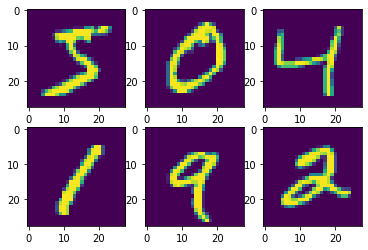

In [3]:
print('Display first 6 training image')
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i,:,:].reshape(28,28))
plt.savefig('mnist_input.png', dpi=300)

In [4]:
print('Prepare data sets for traning and test')
x_train = x_train[..., tf.newaxis] # add a new axis to fit conv2d layer
x_test = x_test[..., tf.newaxis]
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(64) # transform into dataset and batch it
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

Prepare data sets for traning and test


In [5]:
print('Prepare learning model')

def build_mnist_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_mnist_model()
model.summary()

Prepare learning model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2769024   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('Train the model')
model.fit(train_ds, epochs=5, validation_data=test_ds)

Train the model
Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.1802 - accuracy: 0.9458 - val_loss: 0.0678 - val_accuracy: 0.9765
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.0540 - val_accuracy: 0.9823
Epoch 3/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 4/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0473 - val_accuracy: 0.9869
Epoch 5/5
938/938 [==============================] - 26s 27ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0489 - val_accuracy: 0.9856


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0489 - accuracy: 0.9856
Test accuracy: 0.9855999946594238


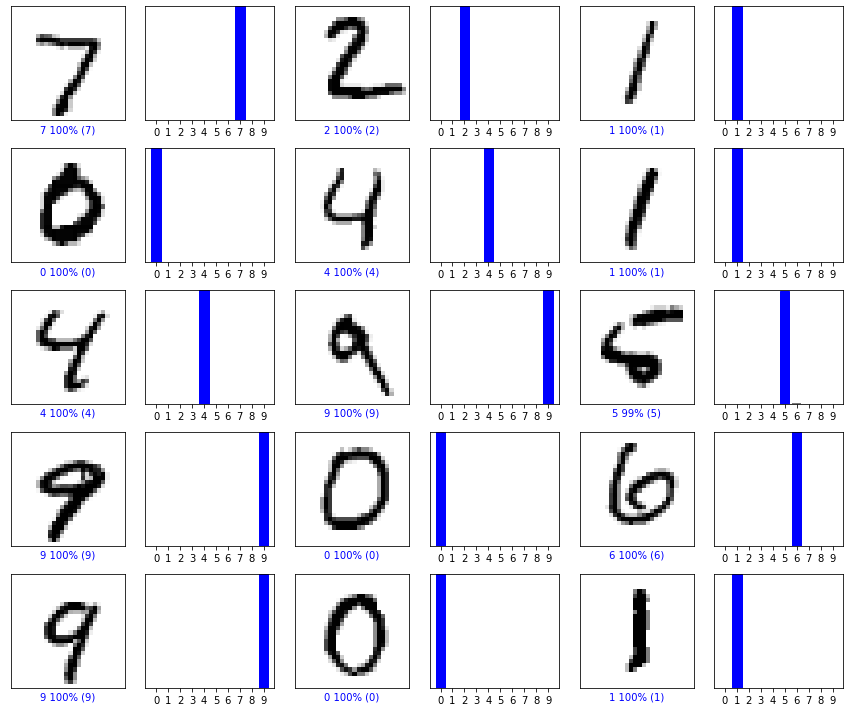

In [9]:
predictions = model.predict(x_test)

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
#plt.show()
plt.savefig('mnist_prediction.png', dpi=300)